In [38]:
import numpy as np
import pandas as pd

import tensorflow as tf

from tensorflow.keras.optimizers import Adam, RMSprop

import matplotlib.pyplot as plt
import seaborn as sns

from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import importlib

import my_models as mds

In [26]:
#x_data =  np.load('/content/drive/MyDrive/Lab/AEDP/X.npy')
x_data =  np.load('./data/X_none_C.npy')
y_data =  np.load('./data/Y_none_C.npy')

In [27]:
x_data = x_data/255
x_data = np.expand_dims(x_data, -1)          
print(x_data.shape)
print(y_data.shape)

(3156, 150, 150, 1)
(3156,)


In [28]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y_data)
y_data = encoder.transform(y_data)

# one-hot incoding
y_data = np_utils.to_categorical(y_data) 
y_data = np.array(y_data).astype('int')
y_data.shape

(3156, 6)

In [29]:
y_data

array([[0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       ...,
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0]])

In [30]:
print(np.unique(y_data))

[0 1]


In [31]:
#data shuffle
nRow = x_data.shape[0]
idx_randmix = np.array(range(nRow))
np.random.seed(99)
np.random.shuffle(idx_randmix)
x_data = x_data[idx_randmix, :, :, :]
y_data = y_data[idx_randmix]

In [32]:
print(x_data.shape)
print(y_data.shape)

(3156, 150, 150, 1)
(3156, 6)


In [33]:
n = round((len(x_data)*0.8))

train = x_data[:n]
label = y_data[:n]

x_test = x_data[n:]
y_test = y_data[n:]

In [34]:
m = round((len(train)*0.8))

x_train = train[:m]
y_train = label[:m]

x_val = train[m:]
y_val = label[m:]

In [35]:
print(f'x_train shape => {x_train.shape}     y_train shape =>{y_train.shape}')
print(f'x_val shape => {x_val.shape}     y_val shape =>{y_val.shape}')
print(f'x_test shape => {x_test.shape}     y_test shape =>{y_test.shape}')

x_train shape => (2020, 150, 150, 1)     y_train shape =>(2020, 6)
x_val shape => (505, 150, 150, 1)     y_val shape =>(505, 6)
x_test shape => (631, 150, 150, 1)     y_test shape =>(631, 6)


In [39]:
class MyCallback(tf.keras.callbacks.Callback):

    def on_epoch_end(self,epoch, logs=None):
        if( epoch % 100 == 0 ):
            print('epoch : {}    loss  : {:.4f}   acc : {:.4f}   val_loss  : {:.4f}    val_acc : {:.4f}'.format(epoch+1,logs['loss'],logs['accuracy'],logs['val_loss'],logs['val_accuracy']))
            
    def on_train_end(self,logs=None):
        print('train END =>  loss  : {:.4f}    val_loss  : {:.4f}'.format(logs['loss'],logs['val_loss']))

In [40]:
#reload libs
importlib.reload(mds)


model = mds.cnn_cla(x_data.shape[1:],6)
opt = Adam(learning_rate=0.00001)

model.compile(loss='categorical_crossentropy',
             optimizer=opt,
             metrics=['accuracy'])  

#model.summary()

2022-03-16 16:52:18.002379: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-16 16:52:18.027188: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-16 16:52:18.027284: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-16 16:52:18.027867: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [ ]:
history = model.fit(
    x=x_train, y=y_train,
    validation_data = (x_val, y_val),
    epochs=8000,
    batch_size=16,
    verbose=0,
    callbacks =[MyCallback()],
)

2022-03-16 16:52:28.512761: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8202
2022-03-16 16:52:29.113861: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-03-16 16:52:29.698879: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


epoch : 1    loss  : 3.2055    val_loss  : 1.8156
epoch : 101    loss  : 1.6986    val_loss  : 1.6544
epoch : 201    loss  : 1.6286    val_loss  : 1.5827
epoch : 301    loss  : 1.5601    val_loss  : 1.5130
epoch : 401    loss  : 1.4680    val_loss  : 1.4464
epoch : 501    loss  : 1.4101    val_loss  : 1.3955
epoch : 601    loss  : 1.3645    val_loss  : 1.3478
epoch : 701    loss  : 1.3290    val_loss  : 1.3114
epoch : 801    loss  : 1.3019    val_loss  : 1.2925
epoch : 901    loss  : 1.2745    val_loss  : 1.2601
epoch : 1001    loss  : 1.2270    val_loss  : 1.2426
epoch : 1101    loss  : 1.1888    val_loss  : 1.2299
epoch : 1201    loss  : 1.1680    val_loss  : 1.2163
epoch : 1301    loss  : 1.1412    val_loss  : 1.2081
epoch : 1401    loss  : 1.1423    val_loss  : 1.2035
epoch : 1501    loss  : 1.1052    val_loss  : 1.1922
epoch : 1601    loss  : 1.0908    val_loss  : 1.1869
epoch : 1701    loss  : 1.0482    val_loss  : 1.1735
epoch : 1801    loss  : 1.0599    val_loss  : 1.1712
epoch

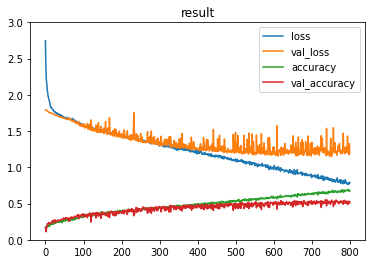

In [34]:
pd.DataFrame(history.history)[['loss', 'val_loss','accuracy', 'val_accuracy']].plot().set_ylim(0,3)
plt.title('result');

In [35]:
result = model.evaluate(x_test, y_test, verbose=0)

In [36]:
print(f"Test Loss : {result[0]}       Test Accuracy : {result[1]}" )

Test Loss : 1.221297025680542       Test Accuracy : 0.5280748605728149


In [37]:
#Grad-CAM
import cv2
from IPython.display import Image, display
from tensorflow import keras
import math
import tensorflow as tf
import matplotlib.cm as cm

In [38]:
model.summary()

Model: "model_65"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 250, 150, 1  0           []                               
                                )]                                                                
                                                                                                  
 random_flip_1 (RandomFlip)     (None, 250, 150, 1)  0           ['input_2[0][0]']                
                                                                                                  
 conv2d_13 (Conv2D)             (None, 250, 150, 8)  80          ['random_flip_1[0][0]']          
                                                                                                  
 max_pooling2d_5 (MaxPooling2D)  (None, 125, 75, 8)  0           ['conv2d_13[0][0]']       

In [39]:
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index = None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array,training = False)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        
        class_channel = preds[:,pred_index]

        #print(class_channel)

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    
    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    #print(last_conv_layer_output)
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    #print(heatmap)
    heatmap = tf.squeeze(heatmap)
    #print(heatmap)
    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    #grad_model.summary()
    return heatmap.numpy()

In [40]:
# using img array  => shape=(batch, N, N', 1)
def heatmap_process_2(img_array) :

    preprocess_input = keras.applications.xception.preprocess_input

    # Prepare image
    #img_size = (256,512)
    #img_array = preprocess_input(get_img_array(img_path, size=img_size))

    #print(img_array.shape)


    last_conv_layer_name = 'conv2d_25'
    # Remove last layer's sigmoid
    model.layers[-1].activation = None

    # Print what the top predicted class is
    preds = model.predict(img_array)
    preds = np.argmax(preds)

    # Generate class activation heatmap
    #pred_index = 0 # 0=20  1=70
    
    heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)
    
    #Display heatmap
    # plt.matshow(heatmap[idx])
    # plt.show()

    # plt.matshow(heatmap_sum)
    # plt.show()

    #print(heatmap)


    return heatmap,preds

In [41]:
# using img array  => shape=(N, N', 1)
def save_and_display_gradcam_2(img, heatmap, cam_path="cam.jpg", alpha=0.002):
    # Load the original image
    #img = keras.preprocessing.image.load_img(img_path)
    #img = keras.preprocessing.image.img_to_array(img)
    
    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)
    
    # Display Grad CAM 
    
    display(Image(cam_path, width = 75, height=125))

In [42]:
x_test.shape

(748, 250, 150, 1)

In [43]:
y_test.shape

(748, 6)

1. target_value = 20대  ->  model's predictions mean => 20대


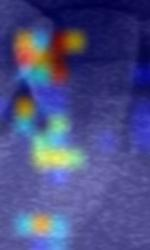


2. target_value = 60대  ->  model's predictions mean => 60대


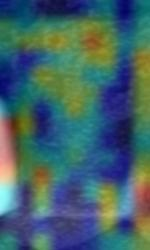


3. target_value = 20대  ->  model's predictions mean => 40대


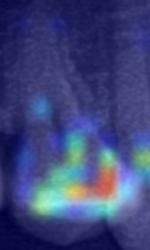


4. target_value = 60대  ->  model's predictions mean => 50대


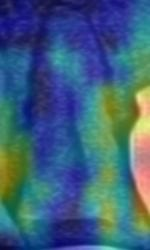


5. target_value = 20대  ->  model's predictions mean => 20대


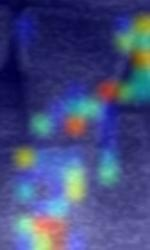

In [51]:
from os import pread
for idx in range(1,6):
  x = np.expand_dims(x_test[idx], 0)
  heatmap_mean,preds= heatmap_process_2(x)
  filename = f'{idx}. target_value = {np.argmax(y_test[idx])*10+20}대  ->  model\'s predictions mean => {preds*10+20}대'         #파일 제목
  filepath = './cla_gradcam/'+filename+'.jpg'                          #파일 저장 경로
  print(filename)
  save_and_display_gradcam_2(x_test[idx],heatmap_mean,filepath)   
  print('')